<a href="https://colab.research.google.com/github/SirisPudasai/Gitproject/blob/master/Poly2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving house_price_regression_dataset.csv to house_price_regression_dataset (1).csv


{'house_price_regression_dataset (1).csv': b'Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price\n1360,2,1,1981,0.5996366396268326,0,5,262382.8522740563\n4272,3,3,2016,4.7530138494020395,1,6,985260.854490162\n3592,1,2,2016,3.634822720478255,0,9,777977.3901185812\n966,1,2,1977,2.73066687604351,1,8,229698.9186636115\n4926,2,1,1993,4.699072554837388,0,8,1041740.8589249004\n3944,5,3,1990,2.475930043628728,2,8,879796.9835223783\n3671,1,2,2012,4.911960066216673,0,1,814427.8614089885\n3419,1,1,1972,2.805281407595683,1,1,703413.1109446795\n630,3,3,1997,1.0142859649909075,1,8,173875.03721558454\n2185,4,2,1981,3.9416043760667474,2,5,504176.5060593679\n1269,2,2,2006,3.5550397628502823,1,9,335332.59275293903\n2891,2,3,1982,3.9784402458751407,0,2,635097.3959198\n2933,5,3,1973,4.781489129265565,2,9,701133.8041471172\n1684,5,3,1988,3.9942018619295814,1,8,440726.2848162878\n3885,2,3,1983,3.251014709974911,1,9,838719.430503504\n4617,5,1,2005,4.3578

In [ ]:
import pandas as pd
import numpy as np
df= pd.read_csv('house_price_regression_dataset.csv')
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [ ]:
df.tail()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
995,3261,4,1,1978,2.165110,2,10,701493.997069
996,3179,1,2,1999,2.977123,1,10,683723.160704
997,2606,4,2,1962,4.055067,0,2,572024.023634
998,4723,5,2,1950,1.930921,0,7,964865.298639
999,3268,4,2,1983,3.108790,2,2,742599.253332


In [ ]:
df.isna().sum()


,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='House_Price'>

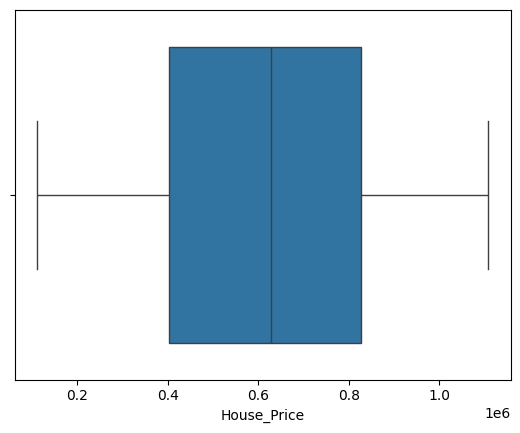

In [ ]:
sns.boxplot(data=df,x='House_Price')

<Axes: >

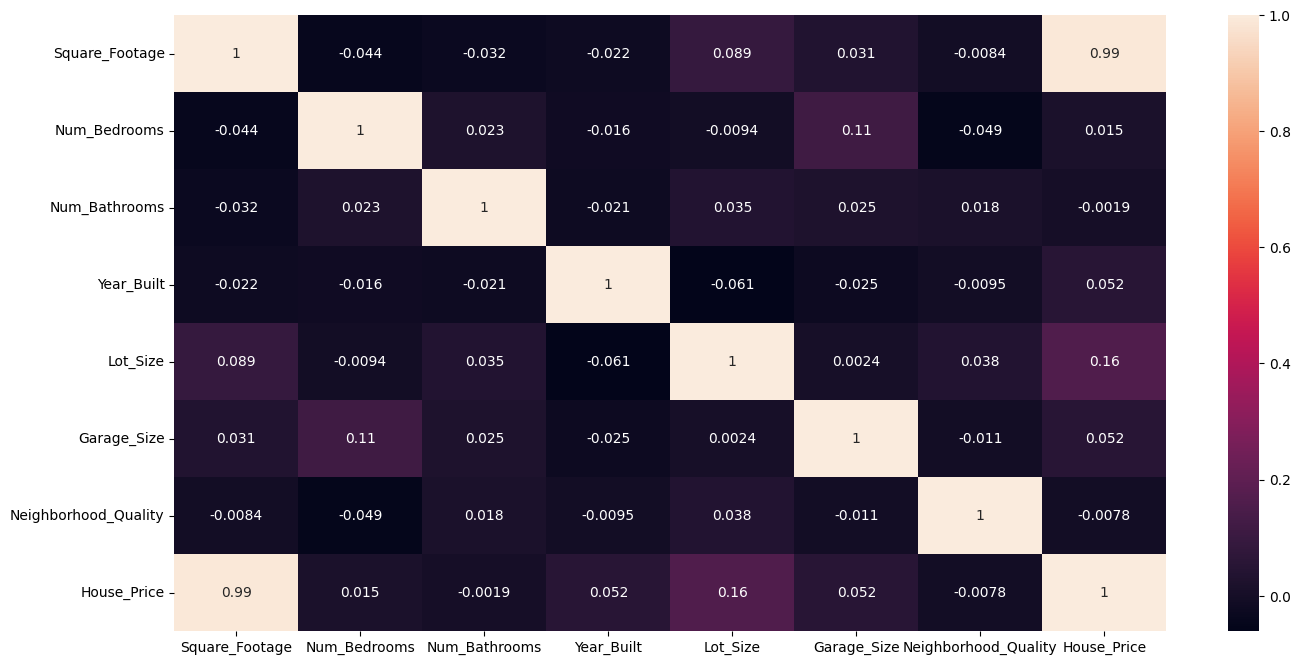

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df['Age'] = 2026 - df['Year_Built']

In [ ]:
df.dtypes

,0
Square_Footage,int64
Num_Bedrooms,int64
Num_Bathrooms,int64
Year_Built,int64
Lot_Size,float64
Garage_Size,int64
Neighborhood_Quality,int64
House_Price,float64
Age,int64


In [ ]:
df.drop(columns='Year_Built',inplace=True)

In [ ]:
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price,Age
0,1360,2,1,0.599637,0,5,2.623829e+05,45
1,4272,3,3,4.753014,1,6,9.852609e+05,10
2,3592,1,2,3.634823,0,9,7.779774e+05,10
3,966,1,2,2.730667,1,8,2.296989e+05,49
4,4926,2,1,4.699073,0,8,1.041741e+06,33


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
x=df.drop(columns='House_Price')
y=df['House_Price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.2,random_state=42
)
x_train_df,x_test_df = pd.DataFrame(x_train),pd.DataFrame(x_test)

In [ ]:
poly = PolynomialFeatures(degree=2) #model to use x and x²
x_train_poly,x_test_poly = poly.fit_transform(x_train_df),poly.fit_transform(x_test_df)

In [ ]:
model = LinearRegression()
model.fit(x_train_poly, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
predict=model.predict(x_test_poly)
r2_score(predict,y_test)

0.9983683928592423